<a href="https://colab.research.google.com/github/TheSpaceMan915/Artificial-Intelligence/blob/main/Lab9_Multilayer_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №9  Колычев Никита  ВПР34**

In [ ]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# **One neuron**

# **Задание 1**
Проанализировать влияние следующих параметров на качество обучения модели: скорость обучения, количество эпох, виды оптимизаторов. Результаты анализа представить в виде графиков (диаграмм)

In [ ]:
path_file = "/content/drive/MyDrive/Colab Notebooks/AI/Datasets/apples_pears.csv"
df = pd.read_csv(path_file)
data = df.iloc[:, :2]
target = df["target"]
data.head()

,yellowness,symmetry
0,0.779427,0.257305
1,0.777005,0.015915
2,0.977092,0.304210
3,0.043032,0.140899
4,0.760433,0.193123


In [ ]:
# creating a model
number_features = data.shape[1]
model_first = tf.keras.Sequential()
model_first.add(tf.keras.layers.Dense(1, input_shape=(number_features,), activation="sigmoid"))

# compiling the model
sgd = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True, learning_rate=0.005)
model_first.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

# training the model
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)
history_first = model_first.fit(data, target, batch_size=30, epochs=500, verbose=1,
                                validation_split=0.2, callbacks=[stopper])

Epoch 1/500
27/27 [==============================] - 2s 20ms/step - loss: 0.8545 - accuracy: 0.2850 - val_loss: 0.8449 - val_accuracy: 0.4150
Epoch 2/500
27/27 [==============================] - 0s 7ms/step - loss: 0.8236 - accuracy: 0.4837 - val_loss: 0.8124 - val_accuracy: 0.5750
Epoch 3/500
27/27 [==============================] - 0s 8ms/step - loss: 0.7932 - accuracy: 0.5900 - val_loss: 0.7818 - val_accuracy: 0.5800
Epoch 4/500
27/27 [==============================] - 0s 11ms/step - loss: 0.7645 - accuracy: 0.5900 - val_loss: 0.7529 - val_accuracy: 0.5800
Epoch 5/500
27/27 [==============================] - 0s 10ms/step - loss: 0.7378 - accuracy: 0.5900 - val_loss: 0.7255 - val_accuracy: 0.5800
Epoch 6/500
27/27 [==============================] - 0s 5ms/step - loss: 0.7126 - accuracy: 0.5900 - val_loss: 0.7000 - val_accuracy: 0.5800
Epoch 7/500
27/27 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5900 - val_loss: 0.6761 - val_accuracy: 0.5800
Epoch 8/50

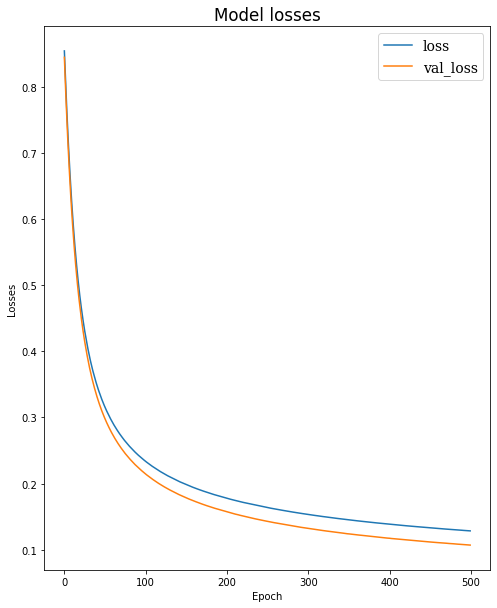

In [ ]:
fig, axes = plt.subplots(1, figsize = (8,10))
axes.plot(history_first.history["loss"], label="loss")
axes.plot(history_first.history["val_loss"], label="val_loss")

plt.rcParams.update({"font.size": 14, "font.family": "serif"})
plt.title("Model losses")
plt.xlabel("Epoch")
plt.ylabel("Losses")
axes.legend(loc=1)

In [ ]:
# creating another model
model_second = tf.keras.Sequential()
model_second.add(tf.keras.layers.Dense(1, input_shape=(number_features,), activation="relu"))

# compiling the model
model_second.compile(loss="hinge", optimizer="adam", metrics=["accuracy"])

# training the model
history_second = model_second.fit(data, target, batch_size=10, epochs=200,
                                  verbose=1, validation_split=0.2, callbacks=[stopper])

Epoch 1/200
80/80 [==============================] - 1s 4ms/step - loss: 1.0000 - accuracy: 0.4100 - val_loss: 1.0000 - val_accuracy: 0.4200
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0000 - accuracy: 0.4100 - val_loss: 1.0000 - val_accuracy: 0.4200
Epoch 3/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0000 - accuracy: 0.4100 - val_loss: 1.0000 - val_accuracy: 0.4200


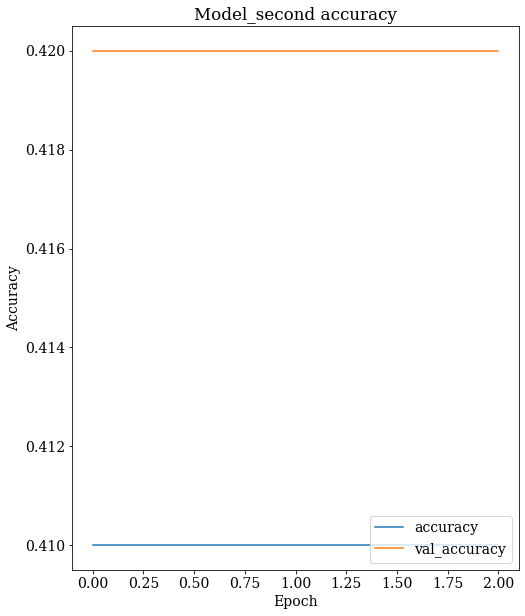

In [ ]:
fig, axes = plt.subplots(1, figsize = (8,10))
axes.plot(history_second.history["accuracy"], label="accuracy")
axes.plot(history_second.history["val_accuracy"], label="val_accuracy")

plt.rcParams.update({"font.size": 14, "font.family": "serif"})
plt.title("Model_second accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
axes.legend(loc=4)

# **Задание 2**
Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов. Результаты анализа представить в виде графиков (диаграмм)

In [ ]:
# preparing data
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype="uint8")

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# converting y to binary class matrixes
y = tf.keras.utils.to_categorical(y, 3)

In [ ]:
# creating a model
model_third = tf.keras.Sequential()
num_features = X.shape[1]
model_third.add(tf.keras.layers.Dense(1, input_shape=(num_features,), activation="sigmoid"))

# compiling the model
adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model_third.compile(loss="mean_squared_error", optimizer=adam, metrics=["accuracy"])

# training the model
history_third = model_third.fit(X, y, epochs=500, batch_size=10, verbose=1,
                        validation_split=0.2)

Epoch 1/500
24/24 [==============================] - 1s 8ms/step - loss: 0.2478 - accuracy: 0.5653 - val_loss: 0.3189 - val_accuracy: 0.3389
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.5944 - val_loss: 0.2984 - val_accuracy: 0.3778
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2352 - accuracy: 0.6194 - val_loss: 0.2812 - val_accuracy: 0.4111
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.6514 - val_loss: 0.2671 - val_accuracy: 0.4333
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.6556 - val_loss: 0.2565 - val_accuracy: 0.4556
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.6625 - val_loss: 0.2482 - val_accuracy: 0.4889
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.6653 - val_loss: 0.2417 - val_accuracy: 0.5444
Epoch 8/500
2

# **Multilayer Perceptron**

# **Задание 1**
1. Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представить в виде графиков (диаграмм).
2. Добавить слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотреть как измениться результат.
3. Добавить слой нормализации (keras.layers.BatchNormalization) и оценить его влияние на качество обучения. 

In [ ]:
# creating a model
num_features = X.shape[1]
model_forth = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(num_features,), activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax")
])

# compiling the model
model_forth.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
history_forth = model_forth.fit(X, y, epochs=150, batch_size=10, verbose=1,
                        validation_split=0.2)

Epoch 1/150
24/24 [==============================] - 2s 12ms/step - loss: 1.1608 - accuracy: 0.4500 - val_loss: 1.1222 - val_accuracy: 0.0000e+00
Epoch 2/150
24/24 [==============================] - 0s 4ms/step - loss: 0.8506 - accuracy: 0.6000 - val_loss: 1.2214 - val_accuracy: 0.0000e+00
Epoch 3/150
24/24 [==============================] - 0s 4ms/step - loss: 0.7254 - accuracy: 0.6792 - val_loss: 1.3057 - val_accuracy: 0.0000e+00
Epoch 4/150
24/24 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.7208 - val_loss: 1.3655 - val_accuracy: 0.0000e+00
Epoch 5/150
24/24 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.6917 - val_loss: 1.4254 - val_accuracy: 0.0000e+00
Epoch 6/150
24/24 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.7208 - val_loss: 1.4910 - val_accuracy: 0.0000e+00
Epoch 7/150
24/24 [==============================] - 0s 4ms/step - loss: 0.6108 - accuracy: 0.7167 - val_loss: 1.5697 - val_accur

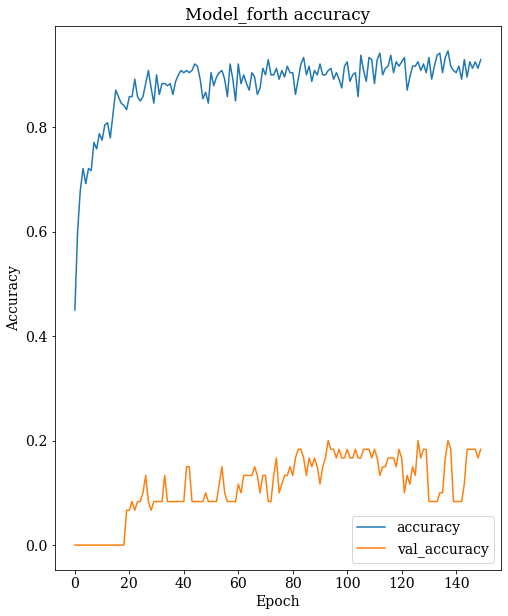

In [ ]:
fig, axes = plt.subplots(1, figsize = (8,10))
axes.plot(history_forth.history["accuracy"], label="accuracy")
axes.plot(history_forth.history["val_accuracy"], label="val_accuracy")

plt.rcParams.update({"font.size": 14, "font.family": "serif"})
plt.title("Model_forth accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
axes.legend(loc=4)

# **Задание 2**
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения. 
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели. 

In [ ]:
# loading data (dataset of pictures with handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
print("x_train", x_train.shape)
print("y_train", y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train (60000, 28, 28)
y_train (60000,)


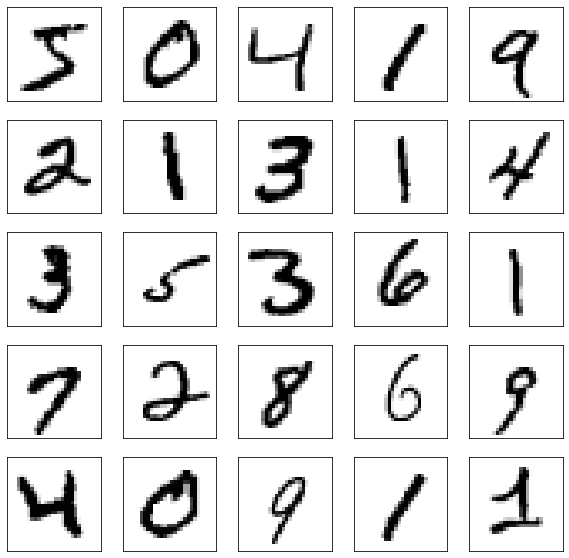

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
# reshaping the 3d arrays to 2d arrays
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]).astype('float32')
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]).astype('float32')
num_features = x_train_reshaped.shape[1]
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train_reshaped /=255
x_test_reshaped /=255

# converting y to binary class matrixes
num_labels = 10
y_train = tf.keras.utils.to_categorical(y_train, num_labels)
y_test = tf.keras.utils.to_categorical(y_test, num_labels)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
# creating a model
model_fifth = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(num_features,), activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# compiling the model
model_fifth.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
history_fifth = model_fifth.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test),
                                epochs=10, batch_size=20, verbose=1,
                                validation_split=0.2, callbacks=[stopper])

Epoch 1/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.3356 - accuracy: 0.8972 - val_loss: 0.1200 - val_accuracy: 0.9623
Epoch 2/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2201 - accuracy: 0.9316 - val_loss: 0.1047 - val_accuracy: 0.9667
Epoch 3/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1851 - accuracy: 0.9427 - val_loss: 0.0891 - val_accuracy: 0.9718
Epoch 4/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.1644 - accuracy: 0.9487 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 5/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1514 - accuracy: 0.9533 - val_loss: 0.0782 - val_accuracy: 0.9776
Epoch 6/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.1369 - accuracy: 0.9572 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 7/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.1321 - accuracy: 0.9595 - val_loss: 0.0748 -

In [ ]:
# evaluating accuracy and loss value
value_loss, value_accuracy = model_fifth.evaluate(x_test_reshaped, y_test)
print("value_loss:", value_loss)
print("accuracy:", value_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0661 - accuracy: 0.9806
value_loss: 0.06605572998523712
accuracy: 0.9805999994277954


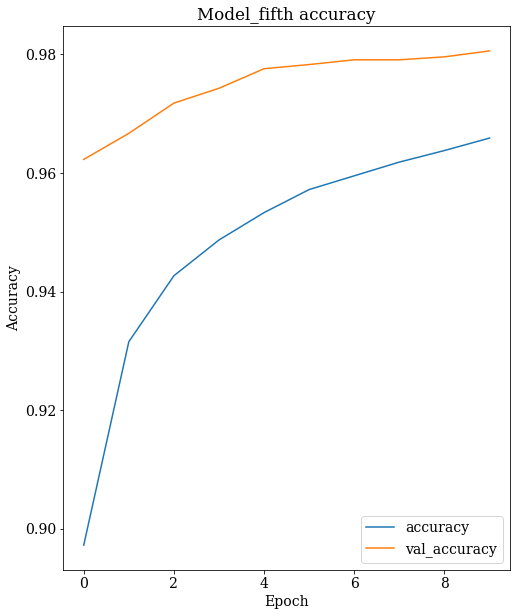

In [ ]:
fig, axes = plt.subplots(1, figsize = (8,10))
axes.plot(history_fifth.history["accuracy"], label="accuracy")
axes.plot(history_fifth.history["val_accuracy"], label="val_accuracy")

plt.rcParams.update({"font.size": 14, "font.family": "serif"})
plt.title("Model_fifth accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
axes.legend(loc=4)

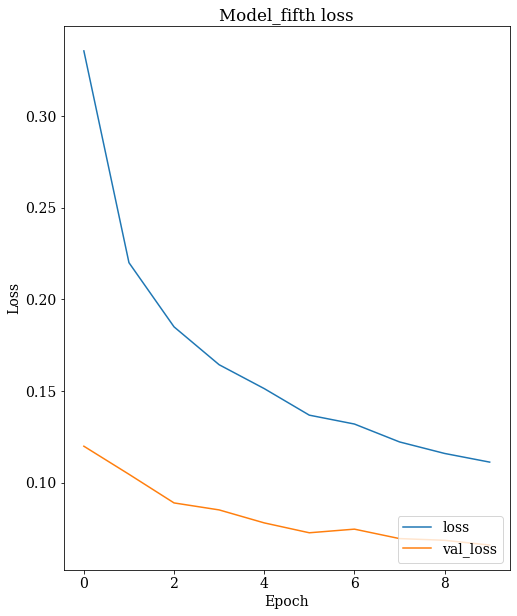

In [ ]:
fig, axes = plt.subplots(1, figsize = (8,10))
axes.plot(history_fifth.history["loss"], label="loss")
axes.plot(history_fifth.history["val_loss"], label="val_loss")

plt.rcParams.update({"font.size": 14, "font.family": "serif"})
plt.title("Model_fifth loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
axes.legend(loc=4)

# **Задание 3**
Измените коэффициент регуляризации на значение 0.5; 0.01 и 1, оцените влияние значения коэффициента на точность сети.

Попробуйте использовать схему регуляризации L1 (bias_regularizer=tf.keras.regularizers.l1(0.0001)), сравните точности модели при L1 и L2 регуляризации.

In [ ]:
# creating a model
lambda_l1 = 1
model_regularised = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(num_features,), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform", bias_regularizer=tf.keras.regularizers.L1(lambda_l1)),
])

# compiling the model
model_regularised.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
history = model_regularised.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test),
                                epochs=10, batch_size=20, verbose=1,
                                validation_split=0.2)

Epoch 1/10
3000/3000 [==============================] - 38s 12ms/step - loss: 0.2374 - accuracy: 0.9280 - val_loss: 0.1137 - val_accuracy: 0.9650
Epoch 2/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1354 - accuracy: 0.9595 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 3/10
3000/3000 [==============================] - 34s 11ms/step - loss: 0.1041 - accuracy: 0.9680 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 4/10
3000/3000 [==============================] - 34s 11ms/step - loss: 0.0859 - accuracy: 0.9733 - val_loss: 0.0900 - val_accuracy: 0.9745
Epoch 5/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.0734 - accuracy: 0.9770 - val_loss: 0.0681 - val_accuracy: 0.9815
Epoch 6/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0868 - val_accuracy: 0.9775
Epoch 7/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.0892 -

In [ ]:
# creating a model
lambda_l2 = 0.01
model_regularised = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(num_features,), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform", bias_regularizer=tf.keras.regularizers.L2(lambda_l2)),
])

# compiling the model
model_regularised.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
history_first = model_regularised.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test),
                                epochs=10, batch_size=20, verbose=1,
                                validation_split=0.2, callbacks=[stopper])

Epoch 1/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.2309 - accuracy: 0.9309 - val_loss: 0.1262 - val_accuracy: 0.9603
Epoch 2/10
3000/3000 [==============================] - 34s 11ms/step - loss: 0.1299 - accuracy: 0.9603 - val_loss: 0.0958 - val_accuracy: 0.9696
Epoch 3/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1037 - accuracy: 0.9675 - val_loss: 0.0769 - val_accuracy: 0.9765
Epoch 4/10
3000/3000 [==============================] - 34s 11ms/step - loss: 0.0846 - accuracy: 0.9738 - val_loss: 0.0860 - val_accuracy: 0.9751
Epoch 5/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.0774 - val_accuracy: 0.9800
Epoch 6/10
3000/3000 [==============================] - 35s 12ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0770 - val_accuracy: 0.9770
Epoch 7/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.0763 -

In [ ]:
# creating a model
lambda_l2 = 0.5
model_regularised = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(num_features,), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform", bias_regularizer=tf.keras.regularizers.L2(lambda_l2)),
])

# compiling the model
model_regularised.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
history_second = model_regularised.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test),
                                epochs=10, batch_size=20, verbose=1,
                                validation_split=0.2, callbacks=[stopper])

Epoch 1/10
3000/3000 [==============================] - 43s 14ms/step - loss: 0.2320 - accuracy: 0.9299 - val_loss: 0.1155 - val_accuracy: 0.9645
Epoch 2/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1331 - accuracy: 0.9591 - val_loss: 0.1027 - val_accuracy: 0.9677
Epoch 3/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.1022 - accuracy: 0.9684 - val_loss: 0.1091 - val_accuracy: 0.9670
Epoch 4/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.0846 - accuracy: 0.9737 - val_loss: 0.0775 - val_accuracy: 0.9758
Epoch 5/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.0710 - accuracy: 0.9776 - val_loss: 0.0787 - val_accuracy: 0.9789
Epoch 6/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.0716 - val_accuracy: 0.9799
Epoch 7/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0898 -

In [ ]:
# creating a model
lambda_l2 = 1
model_regularised = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(num_features,), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="glorot_uniform", bias_regularizer=tf.keras.regularizers.L2(lambda_l2)),
])

# compiling the model
model_regularised.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
history_third = model_regularised.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test),
                                epochs=10, batch_size=20, verbose=1,
                                validation_split=0.2, callbacks=[stopper])

Epoch 1/10
3000/3000 [==============================] - 41s 13ms/step - loss: 0.2335 - accuracy: 0.9287 - val_loss: 0.1145 - val_accuracy: 0.9643
Epoch 2/10
3000/3000 [==============================] - 37s 12ms/step - loss: 0.1320 - accuracy: 0.9591 - val_loss: 0.0935 - val_accuracy: 0.9718
Epoch 3/10
3000/3000 [==============================] - 36s 12ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.0870 - val_accuracy: 0.9730
Epoch 4/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0822 - accuracy: 0.9742 - val_loss: 0.0783 - val_accuracy: 0.9777
Epoch 5/10
3000/3000 [==============================] - 38s 13ms/step - loss: 0.0714 - accuracy: 0.9776 - val_loss: 0.0697 - val_accuracy: 0.9801
Epoch 6/10
3000/3000 [==============================] - 40s 13ms/step - loss: 0.0611 - accuracy: 0.9802 - val_loss: 0.0778 - val_accuracy: 0.9789
Epoch 7/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0793 -

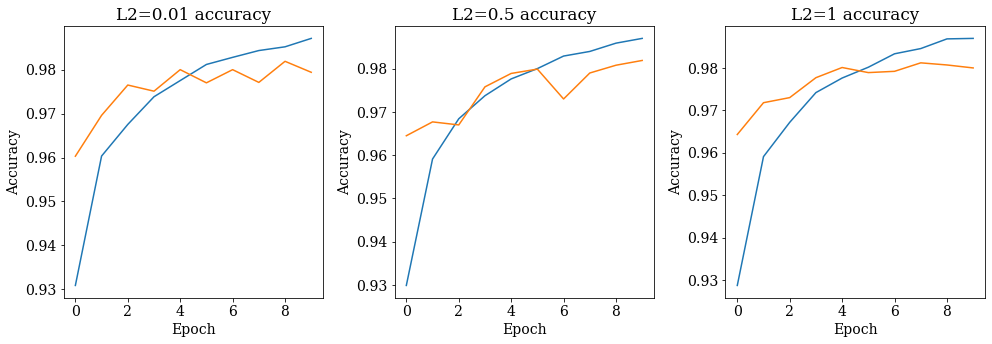

In [ ]:
# drawing charts for L2 regularisation
fig, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(14,5))
plt.rcParams.update({"font.size": 14, "font.family": "serif"})

axes1.plot(history_first.history["accuracy"])
axes1.plot(history_first.history["val_accuracy"])
axes1.set(title="L2=0.01 accuracy")
axes1.set(xlabel="Epoch")
axes1.set(ylabel="Accuracy")

axes2.plot(history_second.history["accuracy"])
axes2.plot(history_second.history["val_accuracy"])
axes2.set(title="L2=0.5 accuracy")
axes2.set(xlabel="Epoch")
axes2.set(ylabel="Accuracy")

axes3.plot(history_third.history["accuracy"])
axes3.plot(history_third.history["val_accuracy"])
axes3.set(title="L2=1 accuracy")
axes3.set(xlabel="Epoch")
axes3.set(ylabel="Accuracy")

# adjusting the graphs so they don't cross
fig.tight_layout()

[Text(0, 0.5, 'Accuracy')]

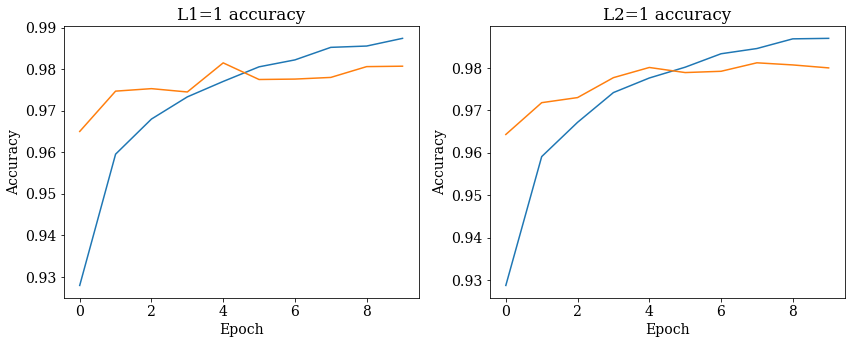

In [ ]:
# drawing charts for L1=1 and L2=1 regularisation
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(14,5))
plt.rcParams.update({"font.size": 14, "font.family": "serif"})

axes1.plot(history.history["accuracy"])
axes1.plot(history.history["val_accuracy"])
axes1.set(title="L1=1 accuracy")
axes1.set(xlabel="Epoch")
axes1.set(ylabel="Accuracy")

axes2.plot(history_third.history["accuracy"])
axes2.plot(history_third.history["val_accuracy"])
axes2.set(title="L2=1 accuracy")
axes2.set(xlabel="Epoch")
axes2.set(ylabel="Accuracy")

**Should use L2 regulariser** because it is better than L1 regulariser

# **Задание 4**
Решить задачу классификации или регрессии для датасета, найденного в 1 практической работе

In [ ]:
# loading the dataset
path_file = "/content/drive/MyDrive/Colab Notebooks/AI/Datasets/happiness.csv"
df = pd.read_csv(path_file)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# dropping columns containing strings
series_regions = df["Region"]
df = df.drop("Region", 1)
df = df.drop("Country", 1)
df.head()

<ipython-input-28-3e1c68fdb304>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Region", 1)
<ipython-input-28-3e1c68fdb304>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Country", 1)


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# encoding string labels to integers
num_classes = series_regions.nunique()
encoder = preprocessing.LabelEncoder()
series_regions_encoded = encoder.fit_transform(series_regions)

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(df, series_regions_encoded, test_size=0.3, random_state=0)

# encoding integers to biniry matrixes
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# creating a model
num_features = df.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(num_features,), activation="relu", kernel_initializer="he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="glorot_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_classes, activation="softmax", kernel_initializer="glorot_uniform"),
])

# compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the model
# stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                epochs=150, batch_size=10, verbose=1)

Epoch 1/150
11/11 [==============================] - 2s 40ms/step - loss: 2.7569 - accuracy: 0.1091 - val_loss: 3.0029 - val_accuracy: 0.1458
Epoch 2/150
11/11 [==============================] - 0s 11ms/step - loss: 2.4779 - accuracy: 0.1818 - val_loss: 2.5024 - val_accuracy: 0.1458
Epoch 3/150
11/11 [==============================] - 0s 11ms/step - loss: 2.3883 - accuracy: 0.1818 - val_loss: 2.3063 - val_accuracy: 0.1250
Epoch 4/150
11/11 [==============================] - 0s 9ms/step - loss: 2.2297 - accuracy: 0.3182 - val_loss: 2.2211 - val_accuracy: 0.2500
Epoch 5/150
11/11 [==============================] - 0s 10ms/step - loss: 2.1902 - accuracy: 0.2818 - val_loss: 2.1941 - val_accuracy: 0.2500
Epoch 6/150
11/11 [==============================] - 0s 9ms/step - loss: 2.1677 - accuracy: 0.2727 - val_loss: 2.1493 - val_accuracy: 0.2292
Epoch 7/150
11/11 [==============================] - 0s 9ms/step - loss: 2.0895 - accuracy: 0.3273 - val_loss: 2.1080 - val_accuracy: 0.2292
Epoch 8/1

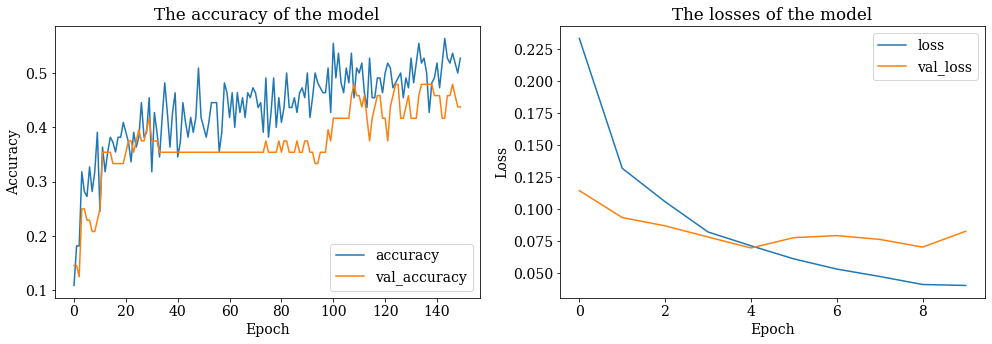

In [ ]:
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(14,5))
plt.rcParams.update({"font.size": 14, "font.family": "serif"})

axes1.plot(history.history["accuracy"], label="accuracy")
axes1.plot(history.history["val_accuracy"], label="val_accuracy")
axes1.set(title="The accuracy of the model")
axes1.set(xlabel="Epoch")
axes1.set(ylabel="Accuracy")
axes1.legend(loc=4)

axes2.plot(history_third.history["loss"], label="loss")
axes2.plot(history_third.history["val_loss"], label="val_loss")
axes2.set(title="The losses of the model")
axes2.set(xlabel="Epoch")
axes2.set(ylabel="Loss")
axes2.legend(loc=1)

# adjusting the graphs so they don't cross
fig.tight_layout()